<a href="https://colab.research.google.com/github/varsha2176/Data_Science_Prodigy/blob/main/prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn nltk scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
from google.colab import files

# Upload files
uploaded = files.upload()

# After uploading, you can load them into pandas
import pandas as pd

# Load the datasets
twitter_df = pd.read_csv('twitter_training.csv')  # Use the actual filename after upload
facebook_df = pd.read_csv('twitter_validation.csv')    # Use the actual filename after upload

# Check the first few rows
print(twitter_df.head())
print(facebook_df.head())


Saving twitter_training.csv to twitter_training (1).csv
Saving twitter_validation.csv to twitter_validation (1).csv
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s gre

In [7]:
# Check the column names of both datasets
print("Twitter Columns:", twitter_df.columns)
print("Facebook Columns:", facebook_df.columns)


Twitter Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Facebook Columns: Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [11]:
import pandas as pd

# Define column names for both datasets
twitter_columns = ['ID', 'Brand', 'Sentiment', 'Text']
facebook_columns = ['ID', 'Platform', 'Sentiment', 'Text']

# Load datasets with the column names
twitter_df = pd.read_csv('twitter_training.csv', header=None, names=twitter_columns)
facebook_df = pd.read_csv('twitter_validation.csv', header=None, names=facebook_columns)

# Check the first few rows to confirm
print(twitter_df.head())
print(facebook_df.head())



     ID        Brand Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
     ID   Platform   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet

In [12]:
# Clean text from the correct column name
def clean_text(text):
    # Your text cleaning steps here (e.g., remove stopwords, punctuation, etc.)
    return text

# Apply the cleaning function
twitter_df['cleaned_text'] = twitter_df['Text'].apply(clean_text)
facebook_df['cleaned_text'] = facebook_df['Text'].apply(clean_text)

# Check cleaned text
print(twitter_df[['Text', 'cleaned_text']].head())
print(facebook_df[['Text', 'cleaned_text']].head())


                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
                                                Text  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the... 

In [14]:
# For Twitter dataset (you can repeat for Facebook as well)
X_train, X_test, y_train, y_test = train_test_split(
    twitter_df['cleaned_text'], twitter_df['Sentiment'], test_size=0.2, random_state=42
)


In [16]:
print(X_train.isnull().sum())  # Check for NaN values in the training set
print(X_test.isnull().sum())   # Check for NaN values in the testing set


550
136


In [17]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align the target variable with the cleaned dataset

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align the target variable with the cleaned dataset


In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [19]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
model = MultinomialNB()

# Train the model on the TF-IDF training data
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [20]:
# Predict on the test data
y_pred = model.predict(X_test_tfidf)


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7479

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.48      0.64      2567
    Negative       0.67      0.91      0.77      4481
     Neutral       0.84      0.65      0.73      3557
    Positive       0.74      0.83      0.78      4196

    accuracy                           0.75     14801
   macro avg       0.80      0.72      0.73     14801
weighted avg       0.78      0.75      0.74     14801


Confusion Matrix:
[[1232  672  158  505]
 [   6 4071  132  272]
 [  26  765 2299  467]
 [  21  552  155 3468]]


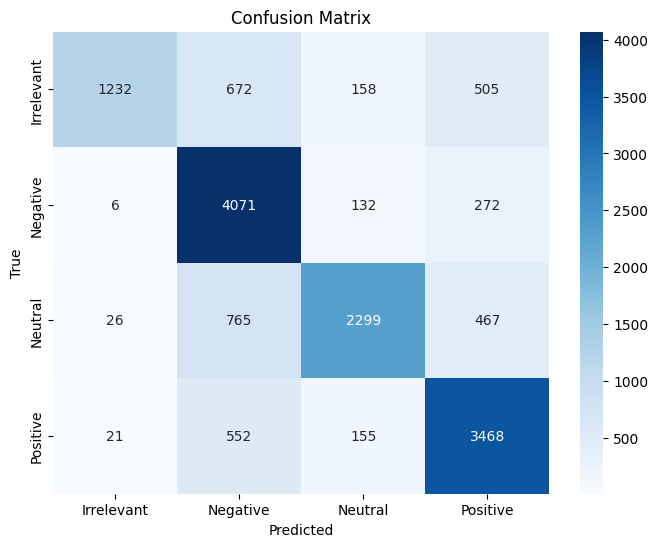

In [22]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameters for hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}  # Example for Naive Bayes

# Set up GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test_tfidf)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Best Model Accuracy: 0.8169


In [24]:
import joblib

# Save the model
joblib.dump(best_model, 'text_classifier_model.pkl')


['text_classifier_model.pkl']

In [25]:
# Load the model
model = joblib.load('text_classifier_model.pkl')

# Predict new data
new_data = ["Your new text here"]
new_data_tfidf = vectorizer.transform(new_data)
prediction = model.predict(new_data_tfidf)
print("Prediction:", prediction)


Prediction: ['Positive']
